## EDA
### Tenure & Customer Lifecycle Analysis
Understand customer lifecycle behavior.

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
## Load the cleaned data
df = pd.read_csv("../data/processed/cleaned_telco_customer_churn.csv")

print(df.shape)
df.head()

(7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. What is the churn rate in the first 3, 6, and 12 months?

In [17]:
## Segment the customer based on tenure
tenure_churn_data = []
tenure_month = [3,6,12]
for month in tenure_month:
    mask = (df['tenure']<=month)
    temp_df = df[mask]['Churn']
    tenure_churn_data.append({"tenure": ' <= '+ str(month), 'Churn_Rate': (temp_df.value_counts(normalize=True)['Yes']*100).round(2)})

tenure_wise_churn_rate = pd.DataFrame(data=tenure_churn_data) 
tenure_wise_churn_rate


,tenure,Churn_Rate
0,<= 3,56.76
1,<= 6,53.30
2,<= 12,47.65


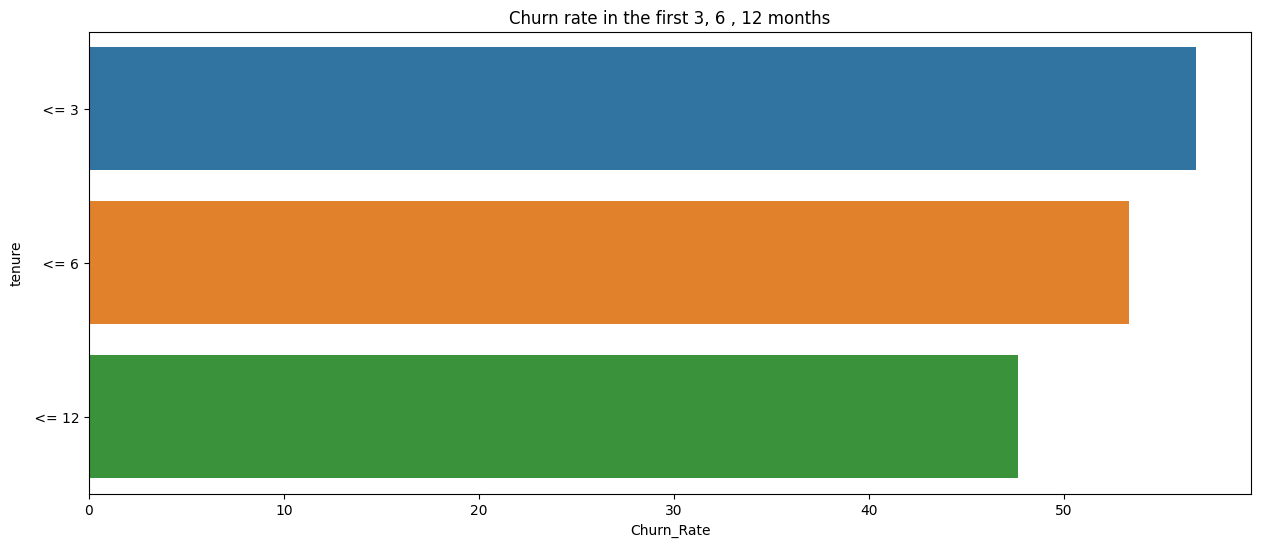

In [18]:
## Visualization
plt.figure(figsize=(15,6))
sns.barplot(data=tenure_wise_churn_rate, x='Churn_Rate', y='tenure', orient='h', hue='tenure')
plt.title("Churn rate in the first 3, 6 , 12 months")
plt.show()

#### Comment:
The above analysis reveals that the churn rate is high almost 56% for customers taking service less than 3 month. It is clear than customer retention increases with the tenure period.

### 2. At what tenure does churn stabilize?

In [27]:
## Segmentation 
df['Tenure_Group'] = pd.cut(
    x = df['tenure'],
    bins=[0,6,12,18,24,30,36,42,48,54,60,66,72],
    labels=['0-6', '7-12', '13-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '61-66', '67+'],
    right=True
)

## Create df of each group with churn rate
tenure_group_wise_churn = df.groupby(['Tenure_Group'], observed=True)['Churn'].agg([lambda x: ((x=='Yes').mean()*100).round(2), 'count'])
tenure_group_wise_churn.columns = ['Churn_Rate', 'Customers']
tenure_group_wise_churn

,Churn_Rate,Customers
Tenure_Group,,
0-6,53.30,1469
7-12,35.89,705
13-18,32.23,546
19-24,24.58,476
25-30,21.73,428
31-36,21.45,401
37-42,21.90,379
43-48,16.19,383
49-54,16.19,420


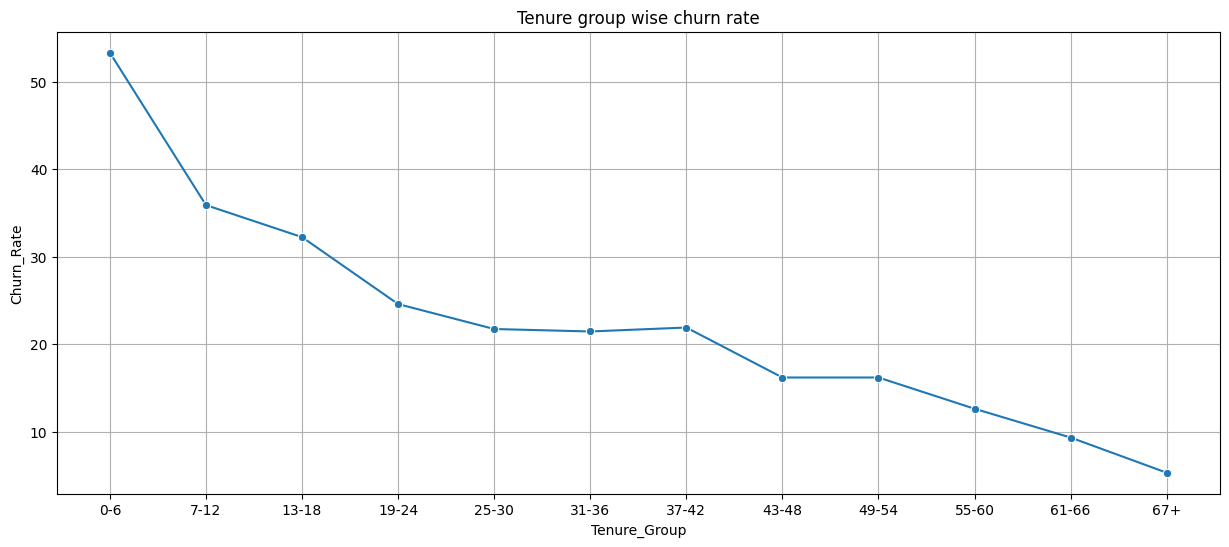

In [33]:
## Visualization
plt.figure(figsize=(15,6))
sns.lineplot(data=tenure_group_wise_churn, x='Tenure_Group', y='Churn_Rate', marker='o')
plt.title("Tenure group wise churn rate")
plt.grid()

#### Comment:
The above plot shows that churn almost stabilzes at group of **(25-42)** months.

### 3. Do long-tenure customers churn less despite higher monthly charges?
Yes, customers with higher tenure has lesser churn than  that of customers with lower tenure though the price or monthly charges is high for them. This indicates they are premium customers.

### 4. Is early-stage churn responsible for most customer loss?

In [36]:
tenure_group_wise_churn['Churned_Customers'] = ((tenure_group_wise_churn['Churn_Rate']/100)*tenure_group_wise_churn['Customers']).round()
tenure_group_wise_churn

,Churn_Rate,Customers,Churned_Customers
Tenure_Group,,,
0-6,53.30,1469,783.0
7-12,35.89,705,253.0
13-18,32.23,546,176.0
19-24,24.58,476,117.0
25-30,21.73,428,93.0
31-36,21.45,401,86.0
37-42,21.90,379,83.0
43-48,16.19,383,62.0
49-54,16.19,420,68.0


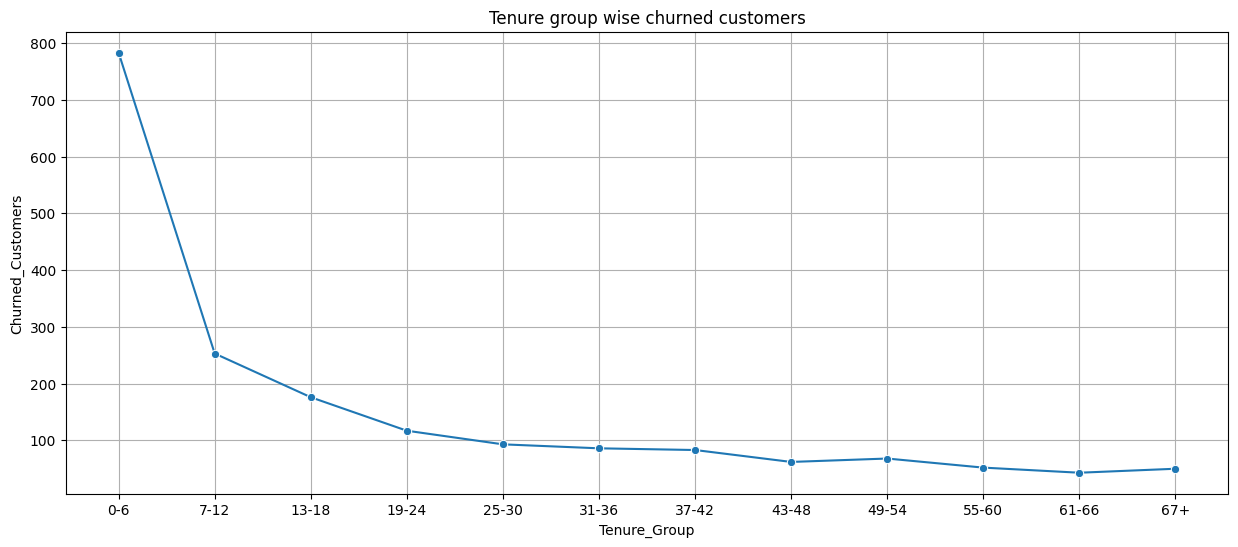

In [37]:
## Visualization
plt.figure(figsize=(15,6))
sns.lineplot(data=tenure_group_wise_churn, x='Tenure_Group', y='Churned_Customers', marker='o')
plt.title("Tenure group wise churned customers")
plt.grid()

#### Comment:
Yes, early-stage churn responsible for most customer loss.

### 5. How does service adoption change with tenure?
From above analysis, we can divide the tenure into 4 effective groups:
* '0-6 months'
* '6-12 months'
* '12-24 months'
* '24+ months'

In [38]:
## Tenure groups
tenure_bins = [0, 6, 12, 24, 100]
tenure_labels = ['0-6 months', '6-12 months', '12-24 months', '24+ months']

df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=tenure_bins,
    labels=tenure_labels,
    right=False
)

df['tenure_group']

0        0-6 months
1        24+ months
2        0-6 months
3        24+ months
4        0-6 months
           ...     
7016     24+ months
7017     24+ months
7018    6-12 months
7019     0-6 months
7020     24+ months
Name: tenure_group, Length: 7021, dtype: category
Categories (4, object): ['0-6 months' < '6-12 months' < '12-24 months' < '24+ months']

In [40]:
## Encode services columns
service_cols = [
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in service_cols:
    df[col] = df[col].map(lambda x: 1 if x=='Yes' else 0)


In [43]:
## Calculate Service Adoption Rate by Tenure Group
service_adoption = (
    df.groupby('tenure_group', observed=False)[service_cols]
    .mean().round(4)
    .reset_index()
)

service_adoption

,tenure_group,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0-6 months,0.8992,0.1950,0.0920,0.1354,0.1155,0.1015,0.1884,0.1840
1,6-12 months,0.9054,0.2736,0.1734,0.1819,0.2020,0.1605,0.2808,0.2980
2,12-24 months,0.9100,0.3569,0.2115,0.2431,0.2469,0.2153,0.3225,0.3167
3,24+ months,0.9025,0.5440,0.3935,0.4733,0.4731,0.3978,0.4866,0.4935


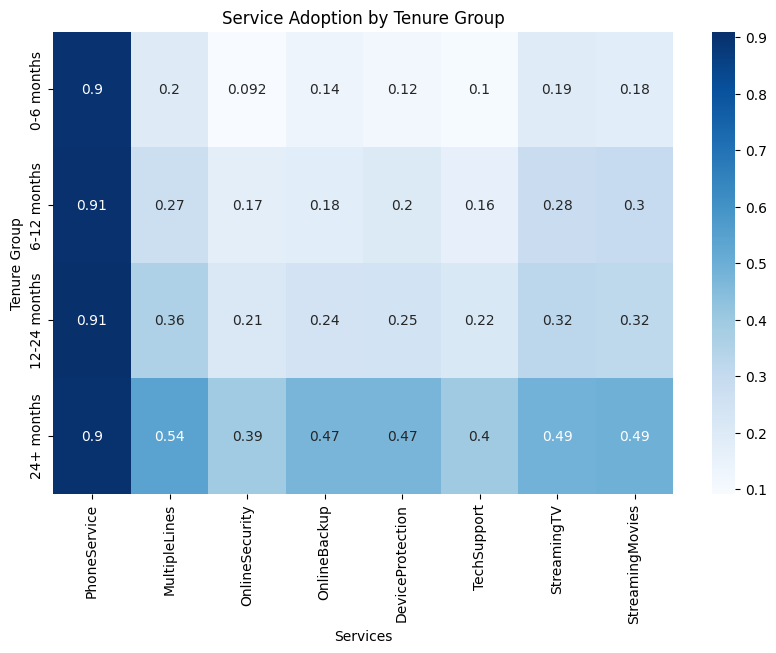

In [49]:
## Visualize Adoption Trend
plt.figure(figsize=(10, 6))
sns.heatmap(
    service_adoption.set_index('tenure_group')[service_cols],
    annot=True,
    cmap='Blues'
)
plt.title("Service Adoption by Tenure Group")
plt.ylabel("Tenure Group")
plt.xlabel("Services")
plt.show()

#### Comment:
It shows a clear view of which services grow with tenure and which remain flat.

In [46]:
## Calculate Average Number of Services per Customer
df['total_services'] = df[service_cols].sum(axis=1)

avg_services = (
    df.groupby('tenure_group', observed=False)['total_services']
    .mean().round(2)
    .reset_index()
)

avg_services

,tenure_group,total_services
0,0-6 months,1.91
1,6-12 months,2.48
2,12-24 months,2.82
3,24+ months,4.16


#### Comment:
It shows that high tenure customers uses several services.

In [47]:
## Merge Adoption Metrics
adoption_summary = pd.merge(
    service_adoption,
    avg_services,
    on='tenure_group'
)

adoption_summary

,tenure_group,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,total_services
0,0-6 months,0.8992,0.1950,0.0920,0.1354,0.1155,0.1015,0.1884,0.1840,1.91
1,6-12 months,0.9054,0.2736,0.1734,0.1819,0.2020,0.1605,0.2808,0.2980,2.48
2,12-24 months,0.9100,0.3569,0.2115,0.2431,0.2469,0.2153,0.3225,0.3167,2.82
3,24+ months,0.9025,0.5440,0.3935,0.4733,0.4731,0.3978,0.4866,0.4935,4.16


## 

In [76]:
## Link Adoption to Churn
churn_by_services = (
    df.groupby('total_services')['Churn']
    .value_counts(normalize=True).round(4)
    .unstack()
    .reset_index()
    .sort_values(by='Yes', ascending=False)
)

churn_by_services

Churn,total_services,No,Yes
0,0,0.5625,0.4375
3,3,0.6352,0.3648
2,2,0.6717,0.3283
4,4,0.6862,0.3138
5,5,0.7439,0.2561
6,6,0.7750,0.2250
1,1,0.7883,0.2117
7,7,0.8756,0.1244
8,8,0.9469,0.0531


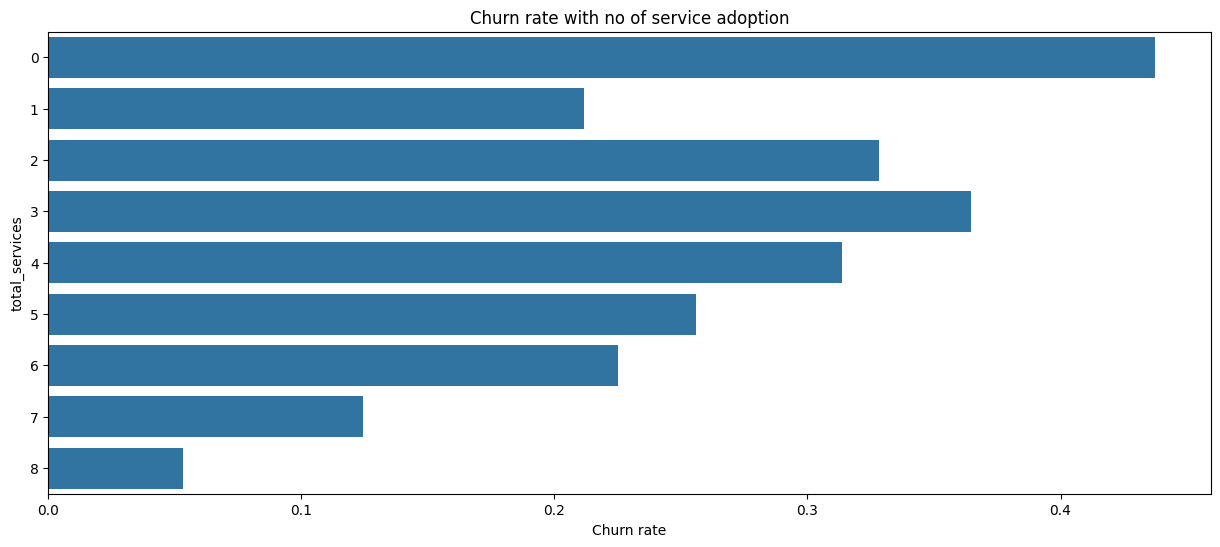

In [79]:
## Visualize
plt.figure(figsize=(15,6))
sns.barplot(data=churn_by_services, y='total_services', x='Yes', orient='h', )
plt.title('Churn rate with no of service adoption')
plt.xlabel('Churn rate')
plt.show()

#### Comment:
This analysis reveals that churn rate decreases with the increase of adoption in total services. That means customers are happy with more services though they have to pay more.

### Business Recommendation

* Push add-on services early (within first 3–6 months) to reduce early churn.
* Offer bundled discounts for new customers to accelerate adoption.
* Focus retention campaigns on customers with low tenure and low service count.

---
### 👨‍💻 Author Information
**Name:** [Amaresh Maity]  
**Date:** 2026-01-08  
**Role:** [Data Scientist | AI Engineer]



#### Let's Connect!

If you have questions about this analysis or would like to collaborate, feel free to reach out:

* **LinkedIn:** [LinkedIn](https://www.linkedin.com/in/amareshmaity/)
* **GitHub:** [@amareshmaity](https://github.com/amareshmaity)
* **Email:** [contacttoamaresh@gmail.com](mailto:contacttoamaresh@gmail.com)